In [ ]:
#https://data-science-blog.com/blog/2018/11/04/sentiment-analysis-using-python/


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [ ]:
#using pip install  wordcloud 
#pip install textblob 

In [4]:
amz_reviews = pd.read_csv("E:\\DataScience\\Inceptez\\Text_analytics\\consumer-reviews-of-amazon-products\\1429_1.csv")    


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
amz_reviews.shape

(34660, 21)

In [6]:
amz_reviews.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [7]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']
 
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))

In [8]:
df.head()

,brand,categories,reviews.rating,reviews.text,reviews.username
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Adapter
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,truman
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,DaveZ
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Shacks
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,explore42


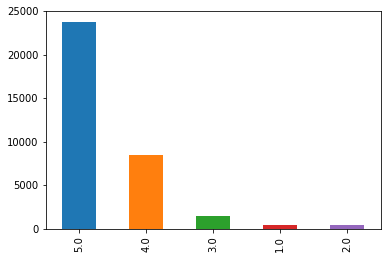

In [9]:

df['reviews.rating'].value_counts().plot(kind='bar')

In [10]:
## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)
 

In [13]:
## Before lowercasing 
df['reviews.text'][2]

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [14]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference

'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

# Special characters
Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>\|+_-[]?}.
Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.

In [15]:
## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')
df['reviews.text'][2]

'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

# Stopwords
Stop-words being most commonly used in the English language; however, these words have no predictive power in reality. Words such as I, me, myself, he, she, they, our, mine, you, yours etc.

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
stop = stopwords.words('english')

df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]

'inexpensive tablet use learn step nabi thrilled learn skype already'

# Stemming algorithm is very useful in the field of text mining and helps to gain relevant information as it reduces all words with the same roots to a common form by removing suffixes such as -action, ing, -es and -ses. However, there can be problematic where there are spelling errors.

In [20]:
st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]

'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [21]:
## Define a function which can be applied to calculate the score for the whole dataset
 
def senti(x):
    return TextBlob(x).sentiment  
 
df['senti_score'] = df['reviews.text'].apply(senti)

In [24]:
   df[['reviews.text','senti_score']]

,reviews.text,senti_score
0,product far disappoint children love use like ...,"(0.3, 0.8)"
1,great beginn experienc person bought gift love,"(0.65, 0.675)"
2,inexpens tablet use learn step nabi thrill lea...,"(0.0, 0.0)"
3,ive fire hd 8 two week love tablet great value...,"(0.29545454545454547, 0.6492424242424243)"
4,bought grand daughter come visit set user ente...,"(0.5, 0.5827777777777777)"
5,amazon fire 8 inch tablet perfect size purchas...,"(0.5666666666666667, 0.7000000000000001)"
6,great eread go nice light weight price point g...,"(0.5249999999999999, 0.6375000000000001)"
7,gave christma gift inlaw husband uncl love eas...,"(0.5, 0.6)"
8,great devic read book like link borrow librari...,"(0.4666666666666666, 0.8833333333333333)"
9,love order book read reader,"(0.5, 0.6)"


# the first score is sentiment polarity which tells if the sentiment is positive or negative and the second score is subjectivity score to tell how subjective is the text